In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Data preprossing

In [4]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Dupliacte data check

In [7]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


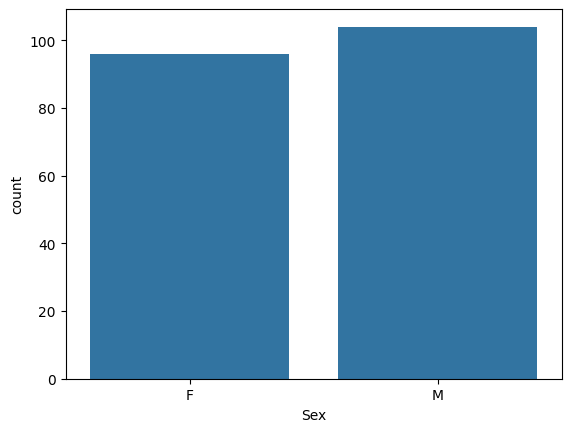

In [11]:
x = df.Sex.value_counts()
print(x)
p = sns.countplot(data = df, x= "Sex")
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


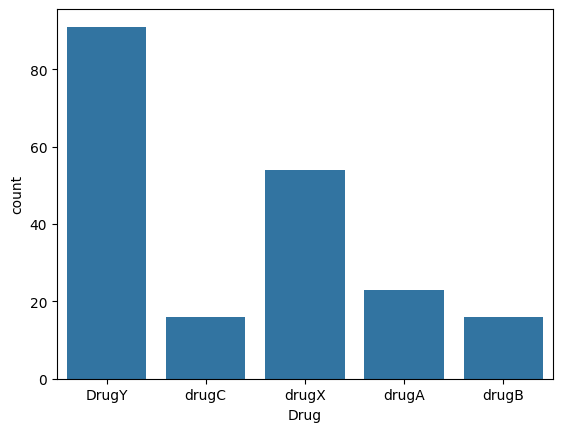

In [12]:
x = df.Drug.value_counts()
print(x)
p = sns.countplot(data = df, x= "Drug")
plt.show()

In [14]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<ipython-input-15-836ea1c8dbc5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']== 'drugY']['Age'],color = 'green')
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
<ipython-input-15-836ea1c8dbc5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist

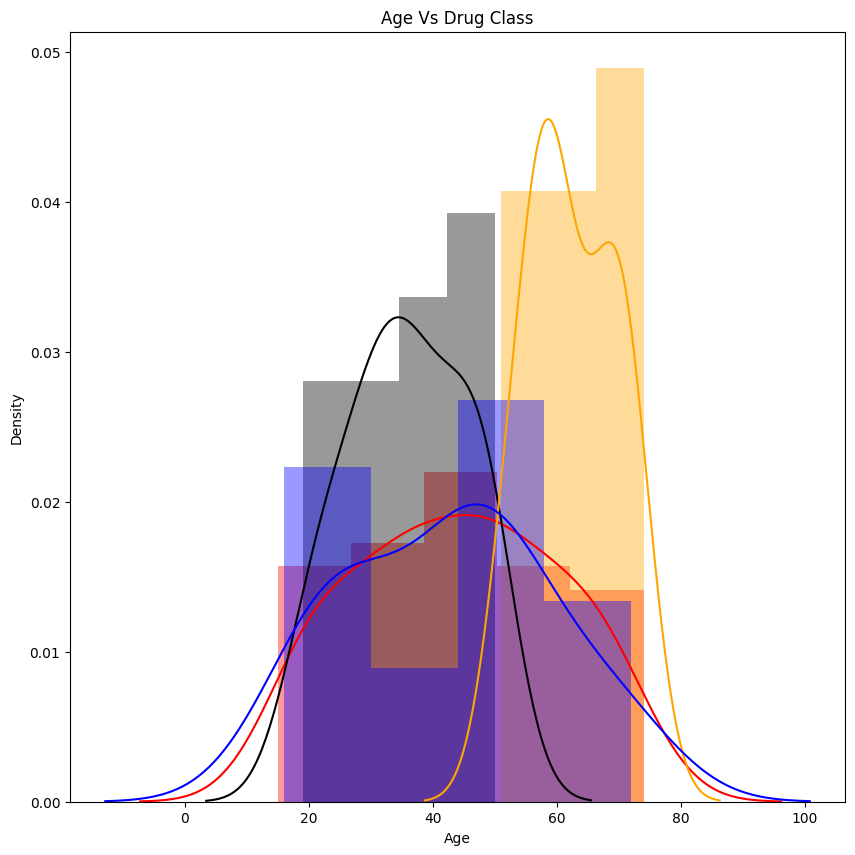

In [15]:
plt.figure(figsize =(10,10))
sns.distplot(df[df['Drug']== 'drugY']['Age'],color = 'green')
sns.distplot(df[df['Drug']== 'drugX']['Age'],color = 'red')
sns.distplot(df[df['Drug']== 'drugA']['Age'],color = 'black')
sns.distplot(df[df['Drug']== 'drugB']['Age'],color = 'orange')
sns.distplot(df[df['Drug']== 'drugC']['Age'],color = 'blue')
plt.title("Age Vs Drug Class")
plt.show()

Dealing with non numeric Values

use endoding- Ordinal Encoder is used to encode categorical data into odinal valeraible into numerical data

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['BP'] = oe.fit_transform(df[['BP']])
df['Sex'] = oe.fit_transform(df[['Sex']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])

In [18]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


Preprocessing stage over

Split Data into input and output format

In [19]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [20]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [21]:
y

,Drug
0,0.0
1,3.0
2,3.0
3,4.0
4,0.0
...,...
195,3.0
196,3.0
197,4.0
198,4.0


Split -Train ,Test

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [23]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [24]:
y_train

,Drug
79,4.0
197,4.0
38,4.0
24,0.0
122,0.0
...,...
106,4.0
14,4.0
92,0.0
179,0.0


Decision Tree classifier


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini',random_state = 0)

clf_gini.fit(X_train,y_train)
y_pred_gini = clf_gini.predict(X_test)

In [33]:
y_pred_gini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

Accuracy Score Check

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_gini)

1.0

100% accuracy

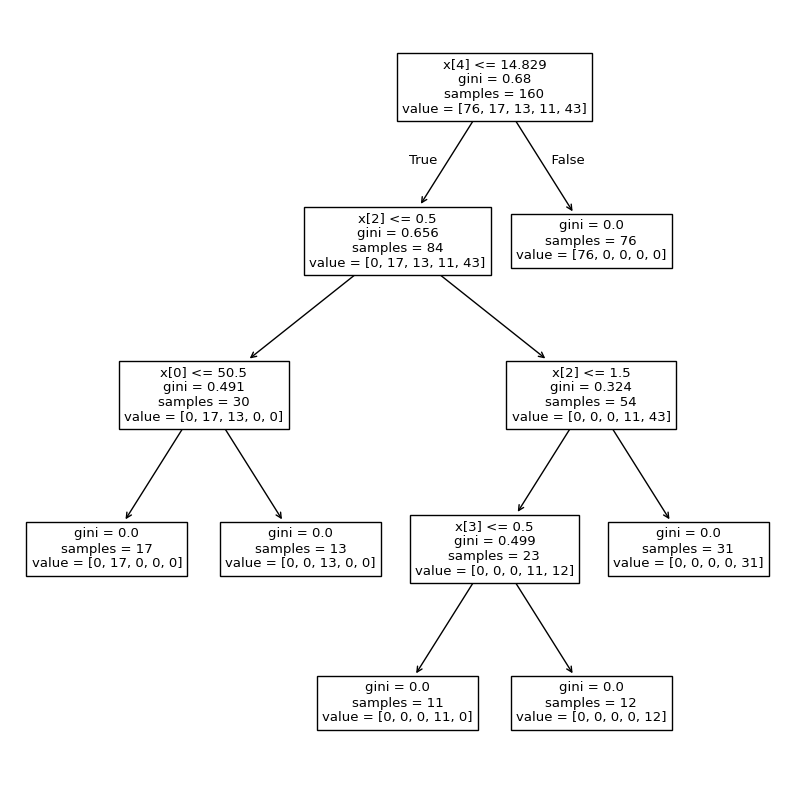

In [35]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_gini.fit(X_train,y_train))
plt.show()

We can see how decions were made on value

Lets try for Entropy

In [36]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3 ,random_state = 0)

clf_entropy.fit(X_train,y_train)
y_pred_entropy = clf_entropy.predict(X_test)

In [37]:
print(accuracy_score(y_test,y_pred_entropy))

0.875


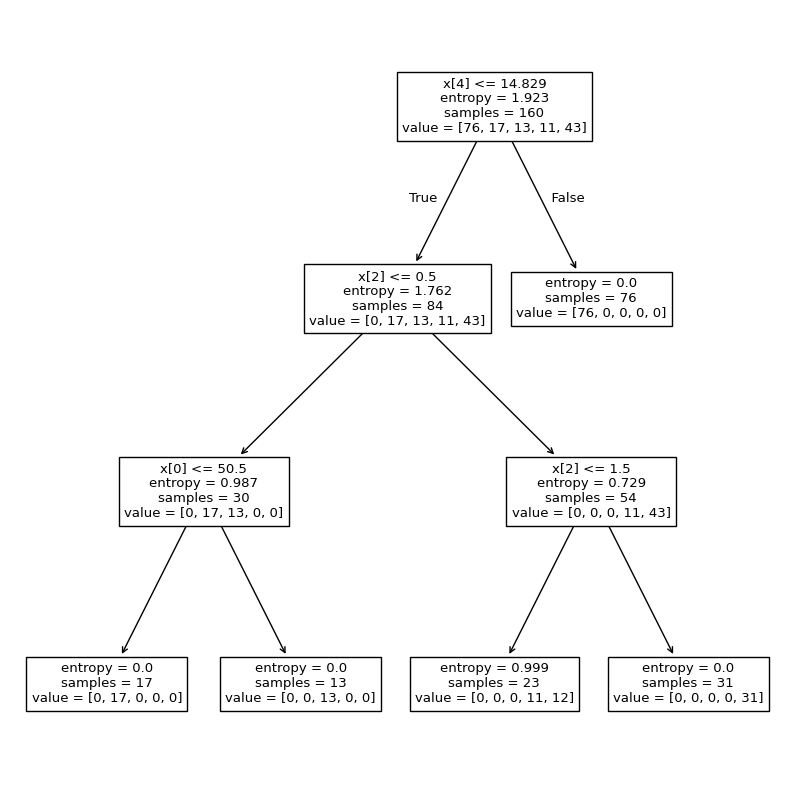

In [38]:
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(clf_entropy.fit(X_train,y_train))
plt.show()